*Name:* Jorge Eduardo Angarita Pérez

*Student Code:* 2248431

In this code, some algorithms from 8.5 section are implemented

First, some libraries are imported.

In [2]:
import numpy as np                          # General numerical data processing
import matplotlib.pyplot as plt             # Plots

### Previous steps:

Function to optimize

In [3]:
def f_obj(x):
    y = (x[0] - 2)**4 + (x[0] - 2*x[1])**2
    return y

Plot the objective function with the analytical minimum for the following range of values:

Text(0, 0.5, '$x_2$')

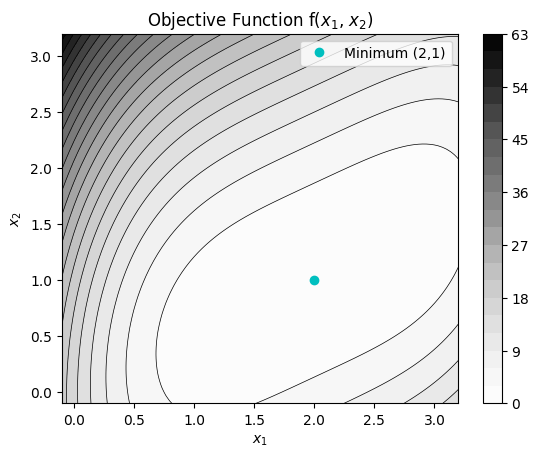

In [9]:
# Grid generation
x = np.linspace(-0.1, 3.2, 100)
y = np.linspace(-0.1, 3.2, 100)
X, Y = np.meshgrid(x, y)

# Function evaluation
Z = f_obj([X, Y])

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Let's continue with some required 1D functions:

In [6]:
# Single-Variable Derivatives

def deriv(f, x, delta):
    y = (f(x + delta) - f(x)) / delta
    return y

def Second_Deriv(f, x, delta):
    y = (f(x + 2*delta) -2*f(x + delta) + f(x)) / delta**2
    return y

# Newton search for 1D

def Newton_Search(f, current, epsilon):
    # Initialization (do While)
    Continue = True
    x = current
    delta = epsilon
    while Continue:
        # First derivative
        deriv_current = deriv(f, x, delta)
        # Second derivative
        deriv2nd_current = Second_Deriv(f, x, delta)
        # Next iteration value
        x_next = x - deriv_current / (deriv2nd_current + delta)
        # Finish flag
        Continue = (abs(x_next - x) > epsilon) & (abs(deriv_current) > epsilon)
        # Update value
        x = x_next
    return x_next

# Multi dimensional to 1-D
def gen_f_1d(f, xi, d):
    def f_1d(l):
        return f(xi + l*d)
    return f_1d

### *8.5 Multidimensional search*

#### *i) Cyclic Coordinate*

In [10]:
def Cyclic_Coord(f, x_ini, epsilon, delta):
    # Initial values
    n = len(x_ini)
    x_next = np.array(x_ini, dtype=float)
    Dir = np.eye(n)

    # Number of iterations
    k = 1
    
    # History of each iterations
    history = [x_next.copy()]
    
    while True:
        # Increase iterations counter
        k += 1
    
        # Update current "x"
        x = x_next.copy()
    
        for i in range(n):
            # Define a new function for the i-th direction
            f_1d = gen_f_1d(f, x_next, Dir[i])
    
            # Optimize the function on this direction
            l_opt = Newton_Search(f_1d, 0, delta)
    
            # Update next "x" value
            x_next = x_next + l_opt*Dir[i]
    
            # Save each update
            history.append(x_next.copy())
    
        # Stop criteria
        if(np.linalg.norm(x_next - x) < epsilon):
            break

    print('\nCyclic Coordinate Method:')
    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history

##### **_Testing_**


Cyclic Coordinate Method:
Final Value = [2.07532316 1.03765658] 
Iterations = 49


Text(0, 0.5, '$x_2$')

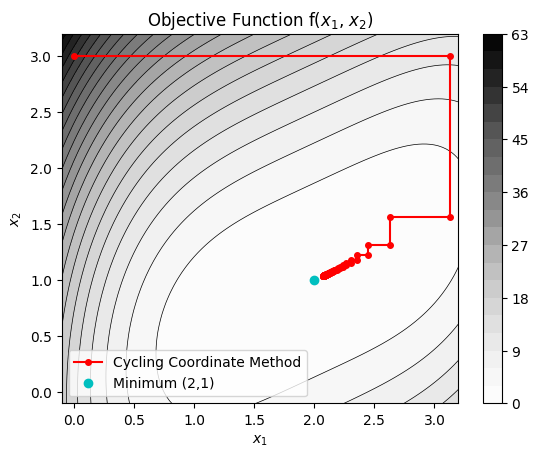

In [11]:
# Parameters for the algorithm
epsilon = 1E-3
delta = epsilon/100

# Run Optimization
x, CyCo_History = Cyclic_Coord(f_obj, [0, 3], epsilon, delta)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

CyCo_History = np.array(CyCo_History)
plt.plot(CyCo_History[:, 0], CyCo_History[:, 1], 'ro-', markersize=4, 
         label="Cycling Coordinate Method")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

#### *ii) Hooke and Jeeves*

In [ ]:
def Hooke_Jeeves(f, x_ini, epsilon, delta):
    # Initial values
    n = len(x_ini)
    x_next = np.array(x_ini, dtype=float)
    Dir = np.eye(n)
    
    # Number of iterations
    k = 1

    # History of each iterations
    x_HoJe = x_next.copy()
    history = [x_next.copy()]
    while True:
        # Increase iterations counter
        k += 1

        # Update current "x"
        x = x_next.copy()
        
        for i in range(n):
            if(i == 0):
                x_next = x_HoJe.copy()

            # Define a new function for the i-th direction
            f_1d = gen_f_1d(f, x_next, Dir[i])

            # Optimize the function on this direction
            l_opt = Newton_Search(f_1d, 0, delta)
            
            # Update next "x" value
            x_next = x_next + l_opt*Dir[i]
            
            # Save each update
            history.append(x_next.copy())

        # "x" variation
        delta_x = x_next - x
        
        # Stop criteria
        if(np.linalg.norm(delta_x) < epsilon):
            break

        # Hooke and Jeeves EXTRA STEP
        l_opt = Newton_Search(gen_f_1d(f, x_next, delta_x), 0, delta)
        x_HoJe = x_next + l_opt*delta_x     # Line search across delta_x

        # Save each update
        history.append(x_HoJe.copy())
    
    print('\nHooke and Jeeves Method:')
    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history

##### **_Testing_**


Hooke and Jeeves Method:
Final Value = [2.01272463 1.00631232] 
Iterations = 6


Text(0, 0.5, '$x_2$')

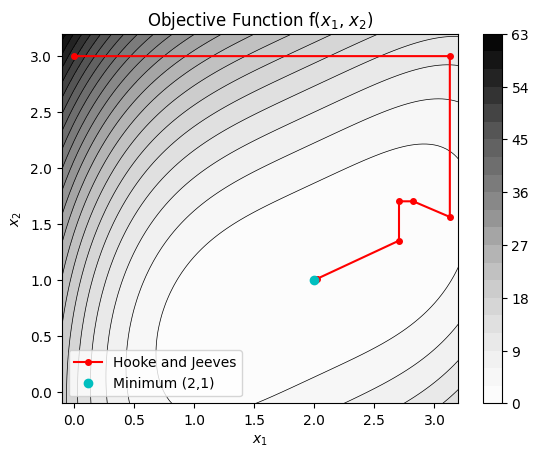

In [104]:
# Parameters for the algorithm
epsilon = 1E-3
delta = epsilon/10

# Run Optimization
x, HoJe_History = Hooke_Jeeves(f_obj, [0, 3], epsilon, delta)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

HoJe_History = np.array(HoJe_History)
plt.plot(HoJe_History[:, 0], HoJe_History[:, 1], 'ro-', markersize=4, 
         label="Hooke and Jeeves")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

#### *iii) Rosenbrock*

In [16]:
# Gram-Schmidt for the Algorithm
def gram_schmidt_update(a, delta_x):
    # Set of new directions
    d = np.copy(a)
    # Implementation of equation 8.9
    d[0] = delta_x / np.linalg.norm(delta_x)  # First element is a normalized b
    
    # Gram-Schmidt Algorithm
    for j in range(1, len(d)):
        for i in range(j):
            # j-th term
            d[j] -= np.dot(a[j], d[i]) * d[i] 
        d[j] /= np.linalg.norm(d[i]) # Normalize each component
    return d

def Rosenbrock(f, x_ini, epsilon, delta):
    # Initial values
    n = len(x_ini)
    x_next = np.array(x_ini, dtype=float)
    Dir = np.eye(n)

    # Number of iterations
    k = 1

    # History of each iterations
    history = [x_next.copy()]
    while True:
        # Increase iterations counter
        k += 1

        # Update current "x"
        x = x_next.copy()

        for i in range(n):
            # Define a new function for the i-th direction
            f_1d = gen_f_1d(f, x_next, Dir[i])

            # Optimize the function on this direction
            l_opt = Newton_Search(f_1d, 0, delta)

            # Update next "x" value
            x_next = x_next + l_opt*Dir[i]

            # Save each update
            history.append(x_next.copy())
        
        # "x" variation
        delta_x = x_next - x
        
        # Stop criteria
        if(np.linalg.norm(delta_x) < epsilon):
            break
        
        # Ortonormal basis generation
        Dir = gram_schmidt_update(Dir, delta_x)

        # Update x value
        x = x_next

    
    print('\nRosenbrock Method:')
    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history

##### **_Testing_**


Rosenbrock Method:
Final Value = [2.00171888 1.00085682] 
Iterations = 12


Text(0, 0.5, '$x_2$')

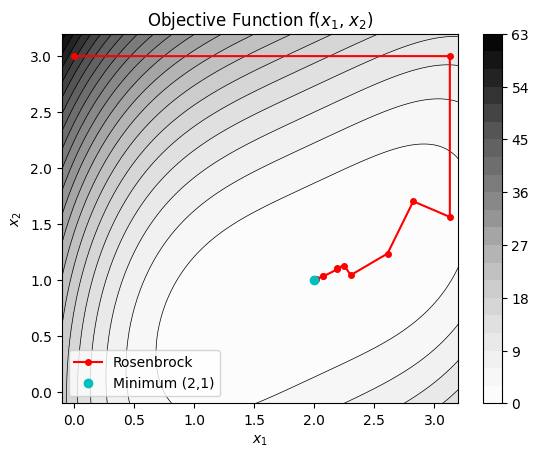

In [21]:
# Parameters for the algorithm
epsilon = 1E-3
delta = epsilon/100

# Run Optimization
x, RoBr_History = Rosenbrock(f_obj, [0, 3], epsilon, delta)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

RoBr_History = np.array(RoBr_History)
plt.plot(RoBr_History[:, 0], RoBr_History[:, 1], 'ro-', markersize=4, 
         label="Rosenbrock")

# Indicate minimum
plt.plot(2, 1, 'co', markersize=6, label='Minimum (2,1)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')